In [2]:
import lsst.cp.pipe as cpPipe

print(cpPipe.__file__)
import lsst.ip.isr as ipIsr
print(ipIsr.__file__)
from lsst.ip.isr.isrTask import IsrTask

from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy
from tqdm import tqdm

import os
import lsst.cp.pipe as cpPipe
import itertools
from matplotlib.colors import LogNorm
import traceback
import pylab
import json
from astropy.time import Time
from lsst.cp.pipe.makeBrighterFatterKernel import BrighterFatterKernelSolveTask, BrighterFatterKernelSolveConfig

/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-7.0.1/Linux64/cp_pipe/gdf35531ce4+5f6e62dbe4/python/lsst/cp/pipe/__init__.py
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-7.0.1/Linux64/ip_isr/g5692000587+aee6f2001b/python/lsst/ip/isr/__init__.py


In [23]:
    
def display(exposure,title=None,frame=0):
    afw_display = afwDisplay.Display(frame=frame, backend='matplotlib')
    afw_display.scale('asinh', 'zscale')
    afw_display.setMaskTransparency(90)
    afw_display.mtv(exposure.getMaskedImage())
    
    maskPlaneDict = exposure.getMask().getMaskPlaneDict()
    maskKeyColorList = []
    for k in maskPlaneDict.keys():
        if afw_display.getMaskPlaneColor(k) is not None:
            maskKeyColorList.append(k + ":" + afw_display.getMaskPlaneColor(k))
    print(maskKeyColorList)
    plt.title(title)

In [4]:
repo_path = "/repo/ir2"
butler = Butler(repo_path,collections=['LSSTCam/photodiode','LSSTCam/raw/all'],instrument='LSSTCam')
registry = butler.registry

In [5]:
sensor="R01_S00"
list(registry.queryDimensionRecords("detector",instrument='LSSTCam',where=f"detector.full_name='{sensor}'"))[0].id

0

In [6]:
where = "exposure.science_program = '13557' and detector=0"
refs = list(set(butler.registry.queryDatasets(
    'postISRCCD',
    where=where,
    collections=butler.registry.queryCollections("*", datasetType="postISRCCD"))))


In [7]:
img = butler.get(refs[0])

['BAD:red', 'CR:magenta', 'DETECTED:blue', 'DETECTED_NEGATIVE:cyan', 'EDGE:yellow', 'INTRP:green', 'NO_DATA:orange', 'SAT:green', 'SUSPECT:yellow', 'UNMASKEDNAN:red']


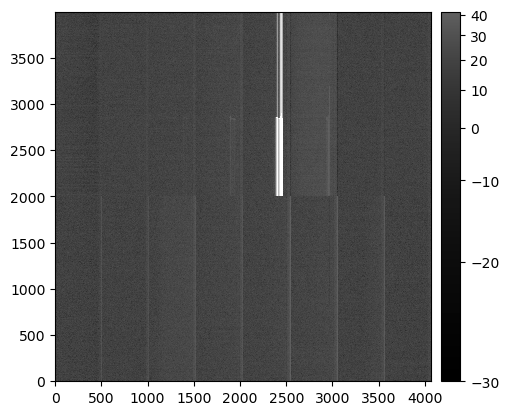

In [24]:
display(img)

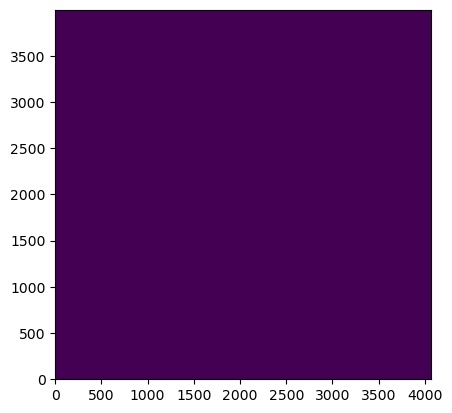

In [90]:
maskedimage=img.getMaskedImage()
pylab.imshow(maskedimage.mask.array,vmin=0,vmax=3,origin="lower")